In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month
df_US_pivot.sort_values('month_no',inplace=True)
df_US_pivot.set_index('job_posted_month',inplace=True)
df_US_pivot.drop(columns=['month_no'],inplace=True)


In [3]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [6]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv',index_col='job_posted_month')
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [10]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on= 'job_posted_month')

In [11]:
top_5 = df_US_merged.sum()

top_5

Business Analyst               7382
Cloud Engineer                  423
Data Analyst                  67816
Data Engineer                 35080
Data Scientist                58830
Machine Learning Engineer       921
Senior Data Analyst           11791
Senior Data Engineer           9289
Senior Data Scientist         12946
Software Engineer              1814
Front-End Developer          151067
Back-End Developer           104700
Full-Stack Developer          75873
UI/UX Designer                52169
dtype: int64

In [16]:
top_5 = top_5.sort_values(ascending=False).head(5).index.to_list()

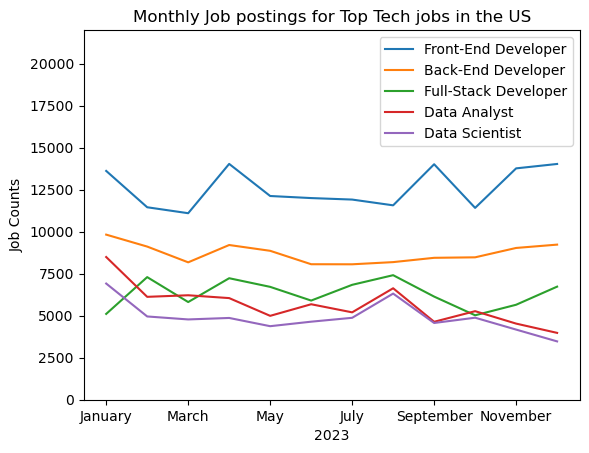

In [23]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job postings for Top Tech jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Counts')
plt.ylim(0,22000)
plt.legend()
plt.show()


In [25]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228
